## **César Bertoni Ocampo**

In [1]:
Libdl.dlopen("/usr/lib/liblapack.so.3", Libdl.RTLD_GLOBAL)
using PyPlot
using SymPy

LoadError: LoadError: ArgumentError: SymPy not found in path
while loading In[1], in expression starting on line 3

### Ejercicio 1: El fractal de Newton

(Ejercicio tomado de un curso de David P. Sanders)

Este ejercicio tiene dos objetivos. Que implementen el método de Newton para una variable (real o compleja) para buscar ceros de una función $f(x)$ dando *también* su derivada, y que construyan un fractal usándolo.

Recordemos primero qué es el método de Newton (o Newton-Raphson) en una variable, para encontrar las raíces (ceros) de una función no lineal $f(x)$. El método de Newton es un método iterativo definido por:

$$
x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)},
$$

a partir de una *condición inicial* $x_0$ dada. (Cualquier libro de cálculo 1 es buena referencia para la construcción.) Lo importante es que $x_{n+1}$, se construye a partir del anterior, usando la función $f(x)$ (cuyas raíces queremos encontrar) y *también* su derivada $f'(x)$. 

El *teorema* dice que si $x_0$ está suficientemente cerca de $x^*$, donde $f(x^*)=0$, entonces $x_n \to x^*$ cuando $n\to\infty$.

1. Implementen una función para encontrar las raíces de una función arbitraria $f(x)$. En particular, consideren $f(x) = x^2 - 2$. (Para escribir $f'(x)$ con caracteres Unicode, simplemente escriba `f\prime<TAB>`.) *HINT:* Como a priori no sabemos si la condición inicial conviene o no, vale la pena poner un tope superior al número de iteraciones del método de Newton.

2. Usa el método de Newton para encontrar las raíces cúbicas de 1, o sea, $g(z) = z^3-1$. Empezando con una malla de condiciones iniciales $z_0$ (en el plano complejo), determina a donde converge cada condición inicial. Guarden los resultados en una matriz: $N_{i,j} = z_{end}(z_0)$, donde $(i,j)$ identifican el punto en la malla. (Algo importante es que en Julia las matrices se almacenan corriendo sobre los renglones, es decir, primero se almacena la primer columna, luego la segunda, etc. Saber esto puede hacer que logren hacer correr las cosas de manera *eficiente*.)

3. Grafiquen los resultados usando `imshow`, `pcolor` y/o `pcolormesh` definidos en `PyPlot`; lean la documentación para ver cómo usar la instrucción que ustedes elijan.

4. ¿Qué modificaciones puedes hacer para hacer ampliaciones? Haz un par de ejemplos. ¿Tiene sentido el uso de la palbra "fractal"?

(Pueden experimentar también con otras funciones complejas, otros polinomios, o `sin`.)

---

In [3]:
function newton(f,d,x,k=1,p=50) #f es la función, d su derivada, x la adivinanza, k un contador y p lel número de iteraciones máximo
        n = x - f(x)/d(x) 
    if abs(f(x))<2e-10
        n 
        elseif k>p #Corte en 50 iteraciones
        n
    else
        k_nueva = k+1
        newton(f,d,n,k_nueva) #La recursión
    end
end

newton (generic function with 3 methods)

In [4]:
function matrizra(funcion,derivada,paso=2.0^-5, tamcaja=12.5,p=50) #tamcaja es la región [-tamcaja,tamcaja]x[tamcaja,tamcaja] en R² biyectiva al 
    #plano en los complejos correspondientes, es el rango de ploteo cuadrado, p la presición para newton
    equis = [i for i in -tamcaja:paso:tamcaja] #Genero números complejos con arreglos donde z = equis + im*eyes
    eyes = equis  #Para tener un arreglo cuadrado lo definio como las equis.
    t=length(equis) #la cantidad de puntos por lado en la región de ploteo,
    M = zeros(Complex{Float64},t,t) #genero una matriz con entradas complejas

    for k in 1:t
        for l in 1:t
            M[k,l]=newton(funcion,derivada,equis[l]+im*eyes[k],1,p) #cambio las entradas de la matriz por el valor de las raices en cada uno de los puntos del cuadrado
        end
    end
    return(M) 
end 

matrizra (generic function with 4 methods)

In [5]:
f(x)=x^3-1 #La función que vamos a considerar
d(x)=3x^2 #y su derivada
U=matrizra(f,d); #Calculamos la matriz a calcular

801x801 Array{Complex{Float64},2}:
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im  …  1.0+9.80047e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-4.73266e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im      1.0-8.8623e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-8.23441e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-6.04011e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im  …  1.0-3.81085e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-2.10681e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-1.00134e-23im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-3.75139e-24im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0-6.87432e-25im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im  …  1.0+5.20219e-25im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0+7.94465e-25im
 -0.5-0.866025im  -0.5-0.866025im  -0.5-0.866025im     1.0+6.85009e-25im
     ⋮          

Iba a hacer una animación para generar un `.gif`, pero revisando unos notebooks de hace casi un año y que en su momento corrian, ahora no lo hicieron, por lo que el zoom lo haré "manual" mediante la siguiente función `zoom`.

In [6]:
function zoom(porcentaje,funcion,derivada,paso=2.0^-5, tamcaja=12.5)
    ampliación = porcentaje*.01
    K = matrizra(funcion,derivada,paso/ampliación, tamcaja/ampliación)
    return K
end

zoom (generic function with 3 methods)

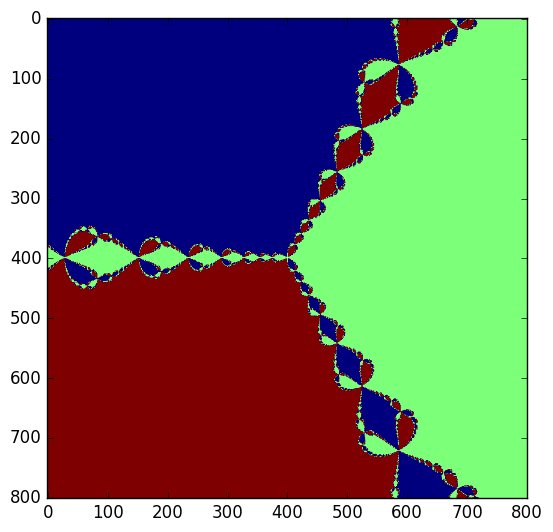

PyObject <matplotlib.image.AxesImage object at 0x7f6650634390>

In [7]:
imshow(imag(U))

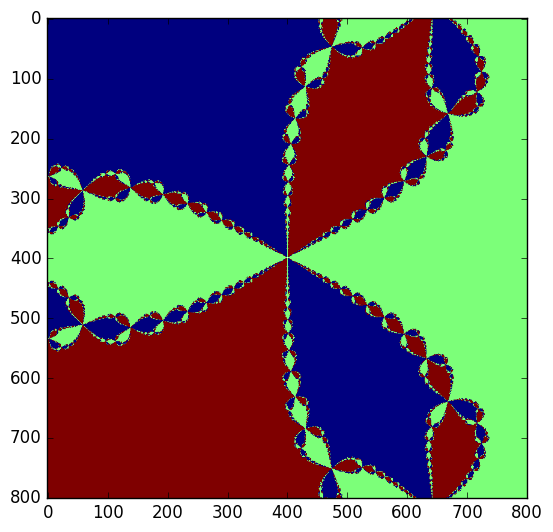

PyObject <matplotlib.image.AxesImage object at 0x7f66504fcb90>

In [8]:
imshow(imag(zoom(1900,f,d))) #Ampliación al 1900%

In [9]:
g(x)=4.0*x^5 - 3.0*x^3  + 20.0*x^2 - 3.0*x - 0.5
dg(x)= 20.0*x^5 - 9.0*x^3 + 40.0*x - 3.0
V = matrizra(g,dg);

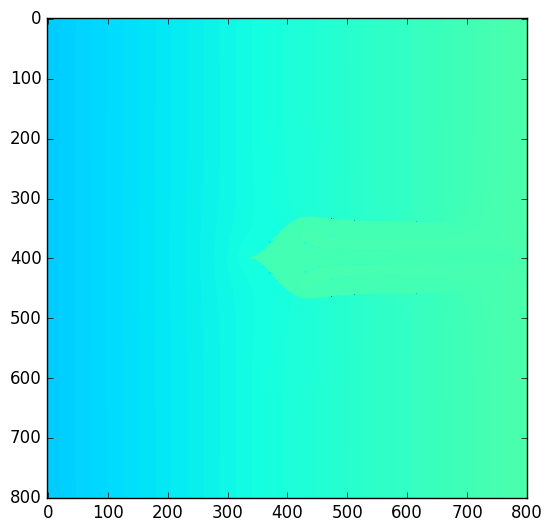

PyObject <matplotlib.image.AxesImage object at 0x7f6650451090>

In [10]:
imshow(real(V))

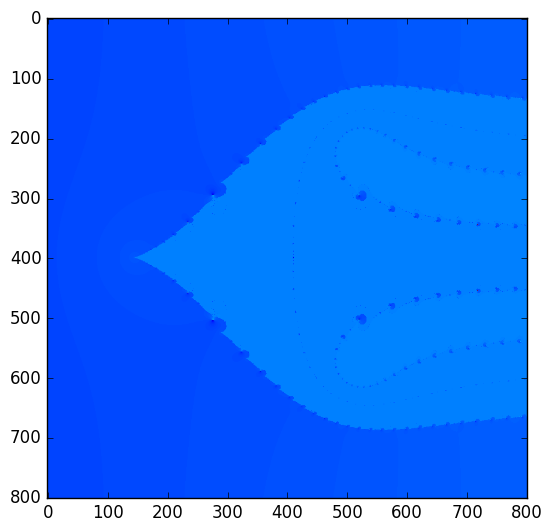

PyObject <matplotlib.image.AxesImage object at 0x7f6650321b50>

In [11]:
ZV=zoom(420,g,dg);
imshow(real(ZV))

In [12]:
h(x)=sin(x)
dh(x)=cos(x)
W = matrizra(h,dh);

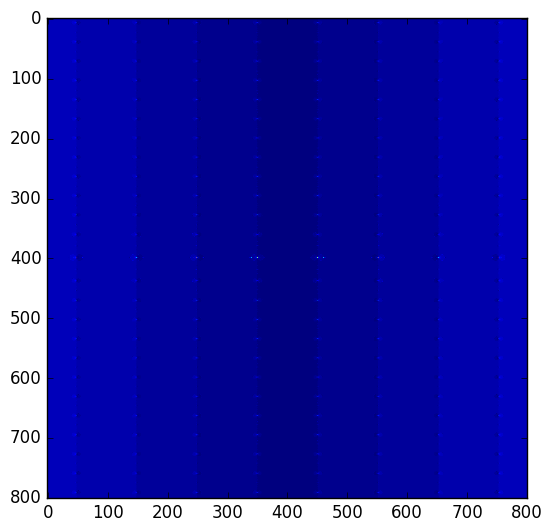

PyObject <matplotlib.image.AxesImage object at 0x7f66502d3f50>

In [13]:
imshow(abs(W))

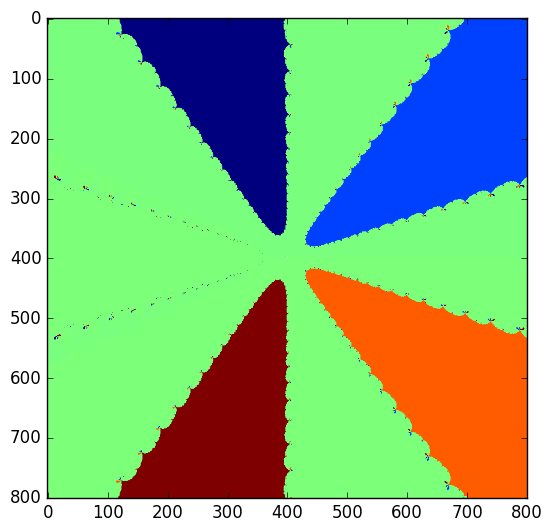

PyObject <matplotlib.image.AxesImage object at 0x7f66501ce150>

In [14]:
j(x)=x^8+6x^3; #La función que vamos a considerar
dj(x)=8x^7+18x^2; #y su derivada
U=matrizra(j,dj) ; #Calculamos la matriz a calcular
imshow(imag(U))

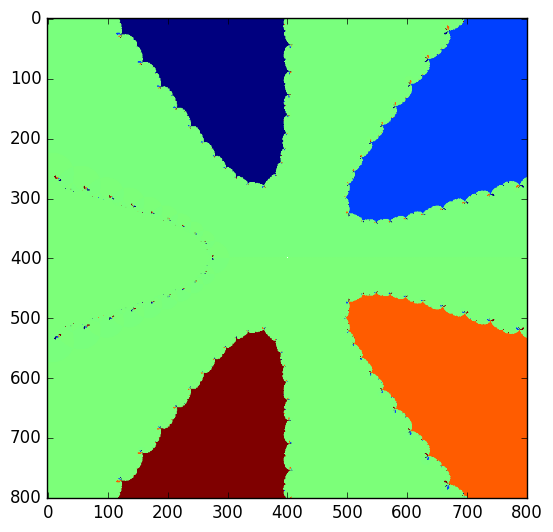

PyObject <matplotlib.image.AxesImage object at 0x7f665011cc10>

In [15]:
L=zoom(332,j,dj);
imshow(imag(L))

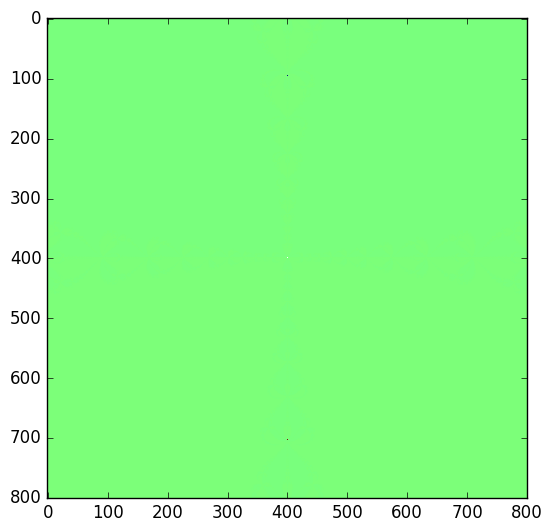

PyObject <matplotlib.image.AxesImage object at 0x7f664fff4710>

In [16]:
j(x)=x^4+1; #La función que vamos a considerar
dj(x)=4x^3; #y su derivada
U=matrizra(j,dj) ; #Calculamos la matriz a calcular
imshow(imag(U))

La implementación del método de Newton, la copié de un notebook que había hecho hace casi un año en el curso de Física computacional con David P. Sanders, pero mejorado con la inicialización de la matriz de ceros, como me lo indicó el profesor Luis Benet (antes de ese cambio, inicializaba dicha matriz con loops y no en broma, tardaba como 10 minutos aprox. en cada gráfica ¡GRACIAS!). El que muestre la parte real, la imaginaria o la norma es tan sólo por conveniencia, lo hice según viera cómo se apreciaba mejor la estructura. El zoom sólo lo apliqué a aquellas figuras que me parecieron más interesantes.

### Ejercicio 2: Operadores como funciones

- ¿Qué pasa si sumas dos cadenas (*strings*)?

- ¿Qué pasa si multiplicas dos cadenas (*strings*)?

- Contruye una función *específica* que sume dos cadenas

---

In [17]:
"hola"+"perro"

LoadError: LoadError: MethodError: `+` has no method matching +(::ASCIIString, ::ASCIIString)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
while loading In[17], in expression starting on line 1

In [18]:
"hola"*"perro"

"holaperro"

In [19]:
type Cadns{T<:String}
    x :: T
end

  likely near In[19]:1
  likely near In[19]:1
  likely near In[19]:1


In [20]:
import Base.+
# ... y aquí se implementa la nueva función
+(a::Cadns,b::Cadns) = Cadns( a.x * b.x )

+ (generic function with 175 methods)

In [21]:
Cadns("hola")+Cadns("perro")

Cadns{ASCIIString}("holaperro")

In [22]:
function sumca(cadenas)
    k=1
    i = length(cadenas)
    g = Cadns("")
    while k <= i
        g += Cadns(cadenas[k])
        k += 1
    end
    return g
end

sumca (generic function with 1 method)

In [23]:
c=("hola","perro","soy","yo","tu","dueño","al","que","mordiste","ayer")

("hola","perro","soy","yo","tu","dueño","al","que","mordiste","ayer")

In [24]:
sumca(c)

Cadns{UTF8String}("holaperrosoyyotudueñoalquemordisteayer")

In [25]:
sumca(("hola","mundo","¿","Cómo","andan?"))

Cadns{UTF8String}("holamundo¿Cómoandan?")

In [26]:
sum((1,2,3)) 

6

El funcionamiento de sumca es semejante al se sum.

Si hacemos una función espefíca que sume sólo dos cadenas, hago lo siguiente. (Creo que esto lo debía hacer primero)

In [27]:
function sumca2(cadena1, cadena2)
    Cadns(cadena1)+ Cadns(cadena2)
end

sumca2 (generic function with 1 method)

In [28]:
sumca2("a","b")

Cadns{ASCIIString}("ab")

Mejor hagamos otra cosa, sobrecarguemos al operador '+' para que haga lo que queremos dados 2 strings.

In [29]:
import Base.+
# ... y aquí se implementa la nueva función
+(a::String,b::String) = a * b

  likely near In[29]:3
  likely near In[29]:3


+ (generic function with 176 methods)

In [30]:
"hola"+"perro"

"holaperro"

### Ejercicio 3: Diferenciación automática

En clase vimos cómo definir estructuras "tipo" (*types*), y los conceptos básicos atrás de los `Duales` que sirven para implementar la diferenciación automática. 

El objetido de este ejercicio es que construyan un *módulo* que permita calcular primeras derivadas de manera más exacta que permita la computadora, o sea, que el error sea del orden del *epsilon* local de la máquina.

1. Define el tipo (estructura) `Dual` que contenga dos campos, el valor de la función y el valor de su derivada. Haz que *ambos* campos tengan el mismo tipo de valor, y que ambos *tengan* que ser un subtipo de `Real`.

- Define métodos para que el dual de un número (sólo *un* número) sea lo que uno espera, y una función `dual_var(x0)` que retorne un dual que represente a la variable *independiente* en `x0`.

- Define métodos que sumen, resten, multipliquen y dividan duales, y números con duales. Incluye los casos (para duales) en que los operadores `+` y `-` actúan sólo sobre un `Dual`.

- Incluye extensiones de las funciones elementales más usuales (`^`, `exp`, `log`, `sin`, `cos`, `sqrt`, etc).

- Muestra que el error numérico de lo que has hecho es esencialmente el epsilon de la máquina. Para esto define alguna función $f(x)$ y aplícala sobre `x = dual_var(x0)`, y muestra que el error es del orden del epsilon de la máquina al rededor del valor verdadero de la derivada.

- Acompaña tu módulo de un archivo "runtest.jl" donde haya casos (no triviales) que permitan verificar que tu módulo hace las cosas correctamente.

- Extiende la función para el método de Newton para que funcione sólo dando la función, y que la derivada la obtenga usando las herramientas del módulo.


---

In [31]:
type Dual{T<:Number}
    x :: T
    y :: T
end

In [32]:
Dual(x,y) = Dual(promote(x,y)...)

Dual{T<:Number}

In [33]:
dual_var(x0::Number) = Dual(x0,1.0)

dual_var (generic function with 1 method)

In [34]:
import Base: +, -, * , / , ^
+(a::Dual, b::Dual) = Dual( a.x + b.x, a.y + b.y )
+(a::Dual, b::Real) = Dual( a.x + b, a.y)
+(b::Real, a::Dual) = Dual( a.x + b, a.y)
+(a::Dual, b::Complex) = Dual( a.x + b, a.y)
+(b::Complex, a::Dual) = Dual( a.x + b, a.y)
+(a::Dual) = Dual(+a.x,+a.y)

-(a::Dual, b::Dual) = Dual( a.x - b.x, a.y - b.y )
-(a::Dual, b::Real) = Dual( a.x - b, a.y)
-(b::Real, a::Dual) = Dual( a.x - b, a.y)
-(a::Dual, b::Complex) = Dual( a.x - b, a.y)
-(b::Complex, a::Dual) = Dual( a.x - b, a.y)
-(a::Dual) = Dual(-a.x,-a.y)


*(a::Dual, b::Dual) = Dual( a.x * b.x, a.y * b.x + b.y * a.x)
*(a::Dual, b::Real) = Dual( a.x * b, a.y * b)
*(b::Real, a::Dual) = Dual( a.x * b, a.y * b)
*(a::Dual, b::Complex) = Dual( a.x * b, a.y * b)
*(b::Complex, a::Dual) = Dual( a.x * b, a.y * b)

/(a::Dual, b::Dual) = Dual( a.x / b.x, ( a.y - (a.x/b.x)b.y)/(b.x))
/(a::Dual, b::Real) = Dual( a.x / b, a.y/b )
/(b::Real, a::Dual) = Dual( a.x / b, a.y/b )
/(a::Dual, b::Complex) = Dual( a.x / b, a.y/b )
/(b::Complex, a::Dual) = Dual( a.x / b, a.y/b )

^(a::Dual, b::Dual) = Dual( a.x ^b.x, b.x * a.x^(b.x-1) * a.y)
^(a::Dual, b::Integer) = Dual( a.x ^ b, b * a.x^(b-1) * a.y)
^(a::Dual, b::Real) = Dual( a.x ^ b, b * a.x^(b-1) * a.y)

^ (generic function with 48 methods)

In [35]:
import Base: abs, sin, cos, tan, cot, sec, sec, asin, acos, atan, acot, 
asec, acsc, exp, sqrt, log, sinh, cosh, tanh, coth, sech, csch, asinh, 
acosh, atanh, acoth, asech, acsch

abs(a::Dual)=Dual(abs(a.x),a.y * sign(a.x)/sign(-a.x)) #con el fin que esté bien definida en 0.
sin(a::Dual)=Dual(sin(a.x),cos(a.x)*a.y)
cos(a::Dual)=Dual(cos(a.x),-sin(a.x)*a.y)
tan(a::Dual)=Dual(tan(a.x),sec(a.x)^2 * a.y)
cot(a::Dual)=Dual(cot(a.x),-csc(a.x)^2 * a.y)
sec(a::Dual)=Dual(sec(a.x),sec(a.x)*tan(a.x)*a.y)
csc(a::Dual)=Dual(csc(a.x),-csc(a.x)*cot(a.x)*a.y)
asin(a::Dual)=Dual(asin(a.x),a.y/sqrt(1-a.x^2))
acos(a::Dual)=Dual(acos(a.x),-a.y/sqrt(1-a.x^2))
atan(a::Dual)=Dual(atan(a.x),a.y/(a.x^2+1))
acot(a::Dual)=Dual(acot(a.x),-a.y/(1+a.x^2))
asec(a::Dual)=Dual(asec(a.x),a.y/(abs(a.x)*sqrt(a.x^2-1)))
acsc(a::Dual)=Dual(acsc(a.x),-a.y/(abs(a.x)*sqrt(a.x^2-1)))
exp(a::Dual)=Dual(exp(a.x),a.x*exp(a.x)*a.y)
sqrt(a::Dual)=Dual(sqrt(a.x),a.y / (2 * sqrt(a.x)))
log(a::Dual)=Dual(log(a.x),a.y/a.x)
sinh(a::Dual)=Dual(sinh(a.x),a.y * cosh(a.x))
cosh(a::Dual)=Dual(cosh(a.x),a.y * sinh(a.x))
tanh(a::Dual)=sinh(a)/cosh(a)
coth(a::Dual)=cosh(a)/sinh(a)
sech(a::Dual)=1/cosh(a)
csch(a::Dual)=1/sinh(a)
asinh(a::Dual)=Dual(asinh(a.x),a.y/sqrt(a.x^2+1))
acosh(a::Dual)=Dual(acosh(a.x),a.y/sqrt(a.x^2-1))
atanh(a::Dual)=Dual(atanh(a.x),a.y/(1-a.x^2))
acoth(a::Dual)=Dual(acoth(a.x),a.y/(1-a.x^2))
asech(a::Dual)=Dual(asech(a.x),-a.y/(a.x*sqrt(1-a.x^2)))
acsch(a::Dual)=Dual(acsch(a.x),-a.y/(abs(a.x)*sqrt(1+a.x^2)))

acsch (generic function with 4 methods)

In [36]:
function eps_num(numero)
    b=0.0    #FIRST QUESTION
    c=0.0    #Declaro variables b y c y las inicializo en cero.
    for i in 0.0:1.0:1000.0   #Corro un índice i de cero a mil aprovechando que julia va de cero en adelante
        ex = -1000.0+i+1.0    #Por eso mismo evaluo los exponentes desde el más chico al más grande.
        c=2.0^(ex)  #y elevo 2 a dicha potencia, aprovechando que es la base natural de la computadora
        b = numero+c #y lo resto al valor del cual nos intereza conocer la \epsilon de la máquina
        if(b != numero)  #si dicha diferencia se hace distinta de uno, entonces en esta última evaluación c es tan grande como
            ex2 = ex+1
            println(2.0^(ex2))  #para cambiar el valor de 1, por lo que el valor anterior que es 2.0^(ex + 1) será el valor 
            #println(ex2)  #de la $epsilon de la máquina, e imprimo dicho valor y el exponente correspondiente$
            break
        end
    end
end

eps_num (generic function with 1 method)

In [37]:
function epsilon_dev(f,punto)
    x = Sym("x") #hago trabajar a x como symb
    esperado = diff(f(x),x) |> replace(x,punto) #hago la derivada de f, en x, y la evaluo en el punto con SymPy
    
    b=0.0    
    c=0.0    
    d=0.0
    
    for i in 0.0:1.0:1000.0   
        ex = -1000.0+i+1.0    
        c=2.0^(ex)  
        b = f(dual_var(punto+c)).y 
        d = abs(esperado-b)
        
    
        if(b != esperado)  
            println("Valor esperado - valor calculado: \n",d)
            println("Epsilon del valor esperado: ") 
            eps_num(esperado)
            println("Epsilon del valor calculado: ")
            eps_num(b)
        break
        end
    end
end 

epsilon_dev (generic function with 1 method)

In [38]:
f(x)=4.0*x^5 - 3.0*x^3  + 20.0*x^2 - 3.0*x - 0.5

f (generic function with 1 method)

In [39]:
epsilon_dev(f,1/4)

LoadError: LoadError: UndefVarError: Sym not defined
while loading In[39], in expression starting on line 1

In [40]:
function newtonn(f,x0,k=1,p=50) #f es la función, x la adivinanza, k un contador y p lel número de iteraciones máximo
    pun = dual_var(x0)
    n = pun.x - f(pun).x / f(pun).y
    if abs(f(dual_var(x0)).x)<2e-10
        n 
        elseif k>p #Corte en 50 iteraciones
        n
    else
        k_nueva = k+1
        newtonn(f,n,k_nueva) #La recursión
    end
end

newtonn (generic function with 3 methods)

In [41]:
function matrizn(funcion,paso=2.0^-5, tamcaja=12.5,p=50,kon=1) #tamcaja es la región [-tamcaja,tamcaja]x[tamcaja,tamcaja] en R² biyectiva al 
    #plano en los complejos correspondientes, es el rango de ploteo cuadrado, p la presición para newton
    equis = [i for i in -tamcaja:paso:tamcaja] #Genero números complejos con arreglos donde z = equis + im*eyes
    eyes = im * equis  #Para tener un arreglo cuadrado lo definio como las equis.
    t=length(equis) #la cantidad de puntos por lado en la región de ploteo,
    M = zeros(Complex64,t,t) #genero una matriz con entradas complejas ceros.

    for k in 1:t
        for l in 1:t
            M[k,l] = newtonn(funcion,equis[l]+eyes[k],kon,p) #cambio las entradas de la matriz por el valor de las raices en cada uno de los puntos del cuadrado
        end
    end
    return(M) 
end 

matrizn (generic function with 5 methods)

In [42]:
f(x)=x^3-1 
U=matrizn(f); 

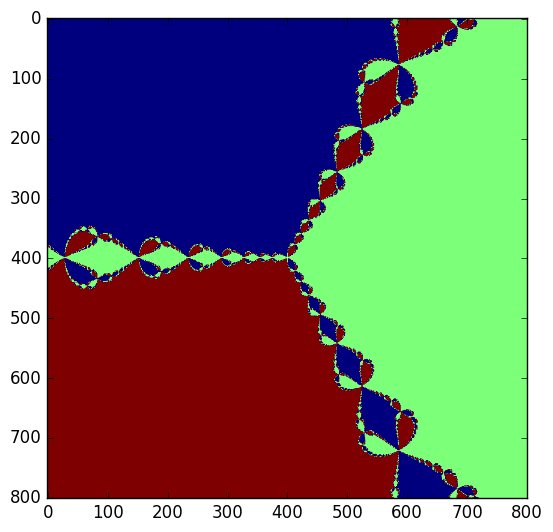

PyObject <matplotlib.image.AxesImage object at 0x7f664ff28b10>

In [43]:
imshow(imag(U))

In [44]:
l(x)=x^6-9x^4-9x^3-6x^2+4x-9
U=matrizn(l);

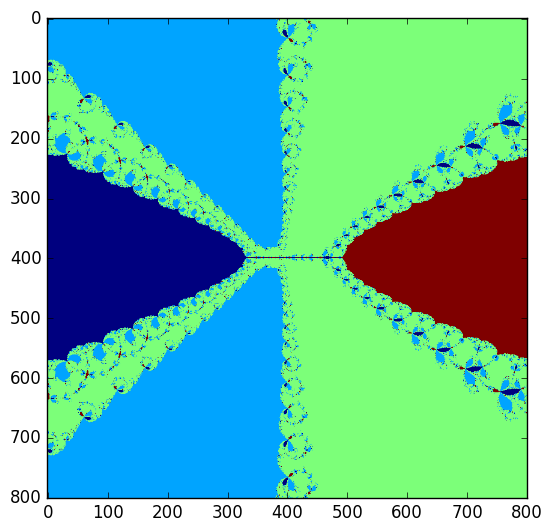

PyObject <matplotlib.image.AxesImage object at 0x7f664fe99cd0>

In [45]:
imshow(real(U))

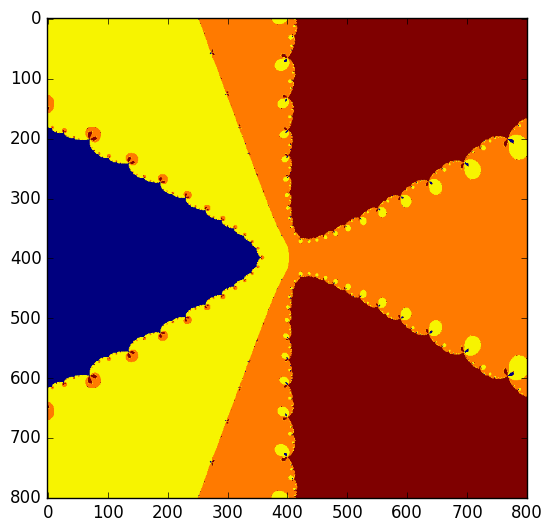

PyObject <matplotlib.image.AxesImage object at 0x7f664fd6f7d0>

In [46]:
g(x)=4.0*x^5 - 3.0*x^3  + 20.0*x^2 - 3.0*x - 0.5
V = matrizn(g);
imshow(real(V))

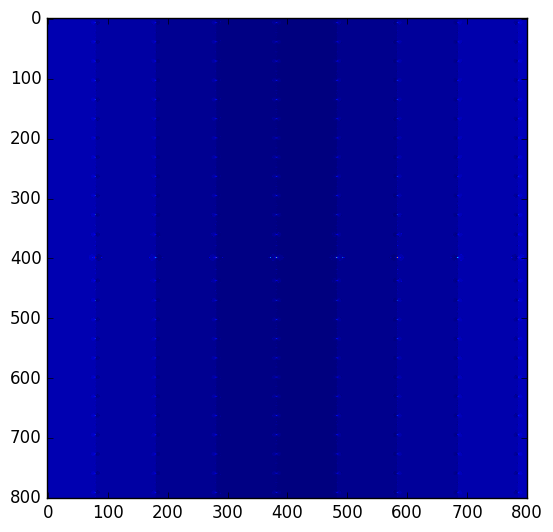

PyObject <matplotlib.image.AxesImage object at 0x7f664fcbdc50>

In [47]:
ñ(x)=sin(x-1)
Ñ=matrizn(ñ);
imshow(abs(Ñ))

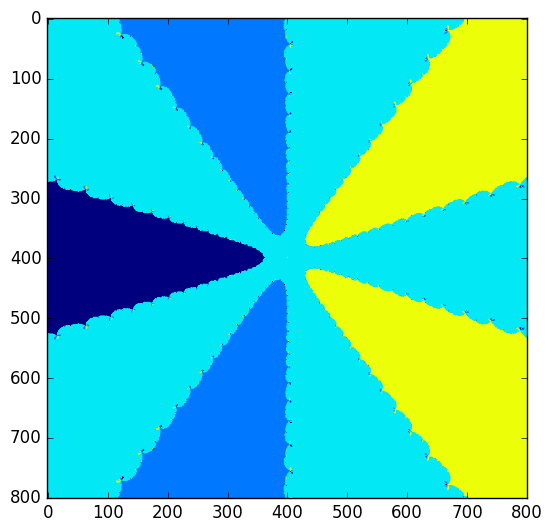

PyObject <matplotlib.image.AxesImage object at 0x7f664fc16c90>

In [48]:
j(x)=x^8+6x^3
J=matrizn(j);
imshow(real(J))